In [ ]:
'''
Polynomial regression
    1 - use poly.fit_transform on x_train: Learns and then transform
    2 - use poly.transform on x_test: Directly transforms

Regularisation
    Regularisation means tuning down weights to add noise to avoid overfitting
    loss function which minimizes mean square error now also includes sum of squares of all weights
        l2/ridge - new loss function becomes  Sum(((yi-y)**2)+lamda(Wj**2))
        l1/Lasso regularisation - new loss function becomes  Sum(((yi-y)**2)+lamda(|Wj|))
        elastic net regularisation - combination of both
    use from sklearn.linear_model import lasso, ridge 
        fit using lasso.fit(train)

    How to use best lambda
        1 - iteration: iterate over multiple values and then calculate error for all the iterations
            you can plot R square for different lambdas for training and test data.
                With increasing lambda, train error increases. Howwever, with increasing lambda test error decreases and then increases
                Sweet spot is wheer difference between both the plots is minimum

Sequence of regression steps
    1 - import libraries
    2 - train test split 
    3 - polynomial degreee confirmation - use cross validation for this . OR choose the best point of inflexion for accuracy against degree
    4 - for ideal degree, find best hyperparameter for all 3 - lasso, ridge and combined model - again using cross validation 
    5 - decide best model based on least error 
    6 - final test  

Cross validation
    Because hyperparameter is optimised using test data. Final accuracy are not ACTUAL test result
    To tackle this, we split the data into 3 sets and not just 2 sets: train, validation and test
    FOr smaller datasets, we use k fold cross validation               
'''


'\nPolynomial regression\n    1 - use poly.fit_transform on x_train: Learns and then transform\n    2 - use poly.transform on x_test: Directly transforms\n\nRegularisation\n    Regularisation means tuning down weights to add noise to avoid overfitting\n    loss function which minimizes mean square error now also includes sum of squares of all weights\n        l2/ridge - new loss function becomes  Sum(((yi-y)**2)+lamda(Wj**2))\n        l1/Lasso regularisation - new loss function becomes  Sum(((yi-y)**2)+lamda(|Wj|))\n        elastic net regularisation - combination of both\n    use from sklearn.linear_model import lasso, ridge \n        fit using lasso.fit(train)\n\n    How to use best lambda\n        1 - iteration: iterate over multiple values and then calculate error for all the iterations\n            you can plot R square for different lambdas for training and test data.\n                With increasing lambda, train error increases. Howwever, with increasing lambda test error decre

# L1 and L2 Regularisation

In [12]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

In [4]:
data=datasets.load_diabetes()

In [5]:
x_data=pd.DataFrame(data['data'])
y_data=pd.DataFrame(data['target'])

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [7]:
poly=PolynomialFeatures(degree=10)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
print(x_train_poly.shape)

(353, 184756)


In [8]:
scaler=StandardScaler()
x_train_poly_scaled=scaler.fit_transform(x_train_poly)
x_test_poly_scaled=scaler.transform(x_test_poly)

In [9]:
model=LinearRegression()
model.fit(x_train_poly_scaled,y_train)
output=model.predict(x_test_poly_scaled)

In [10]:
output_train=model.predict(x_train_poly_scaled)

In [11]:
print(mean_squared_error(y_test,output))
print(float(mean_squared_error(y_train,output_train)))

# See major difference here in train and test data - CLEARLY MODEL IS OVERFIT 

148144.70879934798
1.884822784643851e-23


In [13]:
lasso=Lasso()
ridge=Ridge()

In [17]:
lasso.fit(x_train_poly_scaled,y_train)
y_test_lasso=lasso.predict(x_test_poly_scaled)
y_train_lasso=lasso.predict(x_train_poly_scaled)

c:\Users\Mayank Bhatia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.313e+02, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


In [19]:
print(mean_squared_error(y_test,y_test_lasso))
print(mean_squared_error(y_train,y_train_lasso))

3474.985185128551
1617.6184996283994


In [18]:
ridge.fit(x_train_poly_scaled,y_train)
y_test_ridge=ridge.predict(x_test_poly_scaled)
y_train_ridge=ridge.predict(x_train_poly_scaled)

In [20]:
print(mean_squared_error(y_test,y_test_ridge))
print(mean_squared_error(y_train,y_train_ridge))

115404.51869412464
9.366012734809665


# Combined Operations - Manual 

## Step 1 - Define libraries

In [29]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

## Step 2 - Train test split

In [30]:
data=datasets.load_diabetes()

x_data=pd.DataFrame(data['data'])
y_data=data['target']

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

## Step 3 - Scale Features

In [31]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Step 4 - Choose best polynomial degree

In [32]:
x_points=[]
y_train_scores=[]
y_test_scores=[]
y_train_mse=[]
y_test_mse=[]


for i in range(1,10):
    x_points.append(i)
    poly=PolynomialFeatures(i)
    x_train_scaled_poly=poly.fit_transform(x_train_scaled)
    x_test_scaled_poly=poly.transform(x_test_scaled)
    model=LinearRegression()
    model.fit(x_train_scaled_poly,y_train)
    output_train=model.predict(x_train_scaled_poly)
    output_test=model.predict(x_test_scaled_poly)
    y_train_scores.append(r2_score(y_train,output_train))
    y_test_scores.append(r2_score(y_test,output_test))
    y_train_mse.append(mean_squared_error(y_train,output_train))
    y_test_mse.append(mean_squared_error(y_test,output_test))



### Checking R square numbers

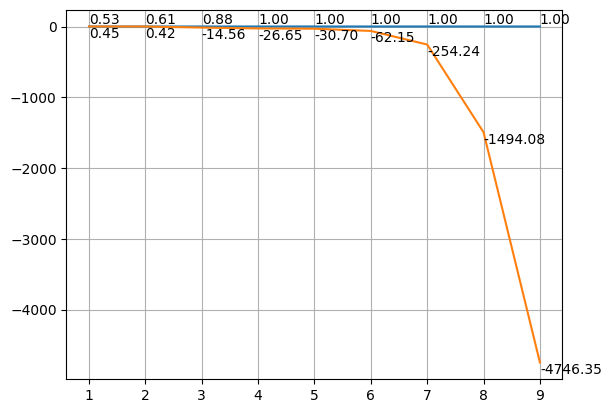

In [33]:
# We see sharp fall in test scores when moving from 2 to 3
sns.lineplot(x=x_points,y=y_train_scores)
for x,y in zip(x_points,y_train_scores):
    plt.text(x,y,f'{y:.2f}',va='bottom')

sns.lineplot(x=x_points,y=y_test_scores)
for x,y in zip(x_points,y_test_scores):
    plt.text(x,y,f'{y:.2f}',va='top')
plt.grid(True)

### Checking MSE numbers

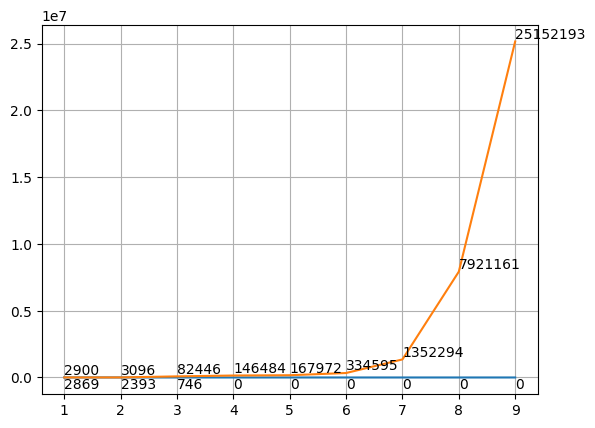

In [34]:
# MSE for test data also increases drastically when we move from degree 2 to 3


sns.lineplot(x=x_points,y=y_train_mse)
for x,y in zip(x_points,y_train_mse):
    plt.text(x,y,s=f'{y:.0f}',va="top")

sns.lineplot(x=x_points,y=y_test_mse)
for x,y in zip(x_points,y_test_mse):
    plt.text(x,y,s=f'{y:.0f}',va="bottom")
plt.grid(True)

## Step 5 - Selecting best hyperparameter for all the models

In [35]:
poly=PolynomialFeatures(2)

x_val_alpha=[]
x_train_scaled_poly=poly.fit_transform(x_train_scaled)
x_test_scaled_poly=poly.transform(x_test_scaled)

ridge_train_mse=[]
ridge_test_mse=[]

ridge_train_r2=[]
ridge_test_r2=[]

lasso_train_mse=[]
lasso_test_mse=[]

lasso_train_r2=[]
lasso_test_r2=[]

en_train_mse=[]
en_test_mse=[]

en_train_r2=[]
en_test_r2=[]


for i in np.arange(0,1000,0.1):
    x_val_alpha.append(i)
    ridge=Ridge(alpha=i)
    ridge.fit(x_train_scaled_poly,y_train)
    ridge_train_output=ridge.predict(x_train_scaled_poly)
    ridge_test_output=ridge.predict(x_test_scaled_poly)

    ridge_train_mse.append(mean_squared_error(y_train,ridge_train_output))
    ridge_test_mse.append(mean_squared_error(y_test,ridge_test_output))

    ridge_train_r2.append(r2_score(y_train,ridge_train_output))
    ridge_test_r2.append(r2_score(y_test,ridge_test_output))


    lasso=Lasso(alpha=i)
    lasso.fit(x_train_scaled_poly,y_train)
    lasso_train_output=lasso.predict(x_train_scaled_poly)
    lasso_test_output=lasso.predict(x_test_scaled_poly)

    lasso_train_mse.append(mean_squared_error(y_train,lasso_train_output))
    lasso_test_mse.append(mean_squared_error(y_test,lasso_test_output))

    lasso_train_r2.append(r2_score(y_train,lasso_train_output))
    lasso_test_r2.append(r2_score(y_test,lasso_test_output))
    

    en=ElasticNet(alpha=i)
    en.fit(x_train_scaled_poly,y_train)
    en_train_output=en.predict(x_train_scaled_poly)
    en_test_output=en.predict(x_test_scaled_poly)

    en_train_mse.append(mean_squared_error(y_train,en_train_output))
    en_test_mse.append(mean_squared_error(y_test,en_test_output))

    en_train_r2.append(r2_score(y_train,en_train_output))
    en_test_r2.append(r2_score(y_test,en_test_output))

c:\Users\Mayank Bhatia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Mayank Bhatia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mayank Bhatia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.251e+05, tolerance: 2.145e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of 

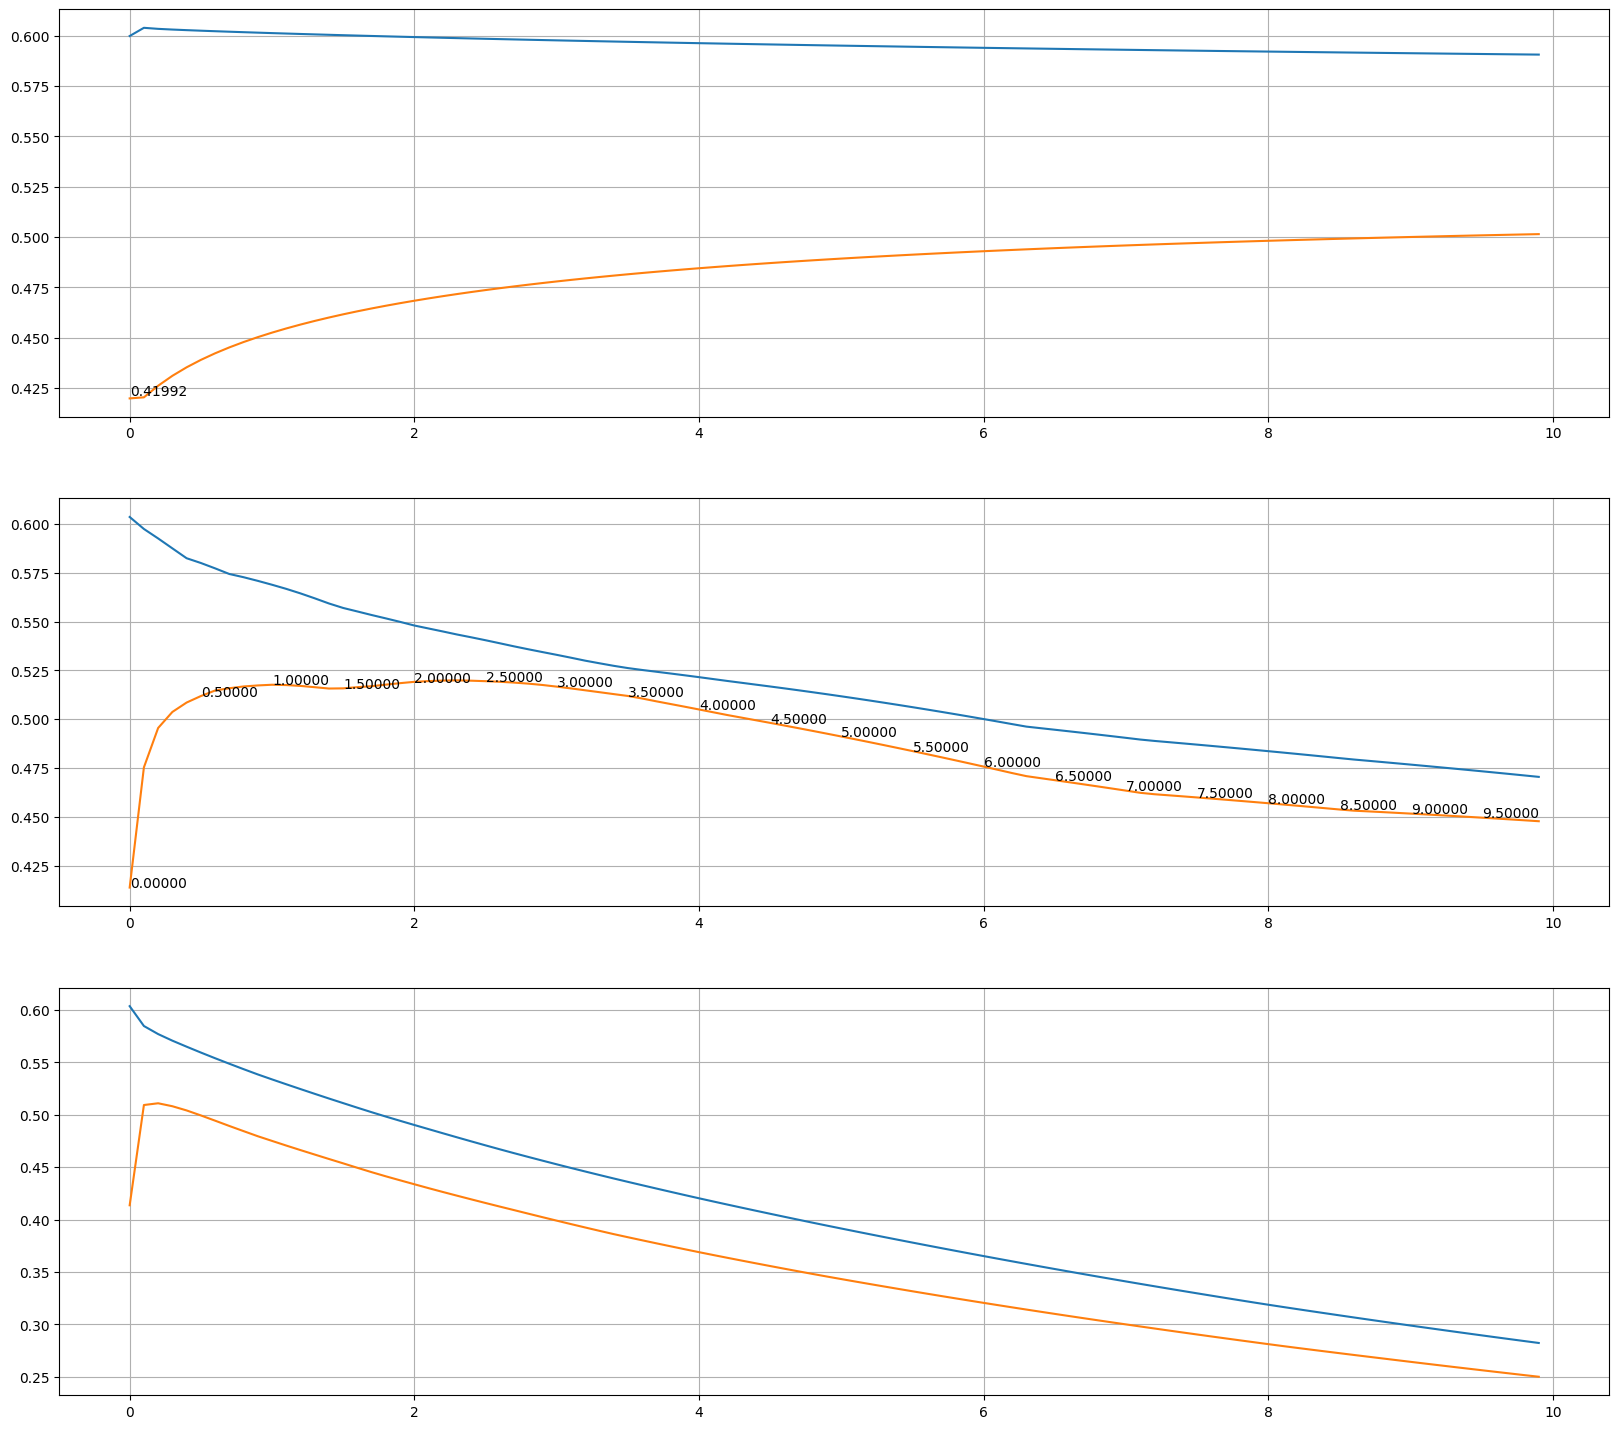

In [36]:
limit =100

plt.figure(figsize=(20, 18))

plt.subplot(3,1,1)
sns.lineplot(x=x_val_alpha[:limit],y=ridge_train_r2[:limit])
plt.grid(True)

sns.lineplot(x=x_val_alpha[:limit],y=ridge_test_r2[:limit])
for x,y in zip(x_val_alpha[:limit:150],ridge_test_r2[:limit:150]):
    plt.text(x,y,f'{y:.5f}',va='bottom')
plt.grid(True)

plt.subplot(3,1,2)
sns.lineplot(x=x_val_alpha[:limit],y=lasso_train_r2[:limit])
plt.grid(True)

sns.lineplot(x=x_val_alpha[:limit],y=lasso_test_r2[:limit])
for x,y in zip(x_val_alpha[:limit:5],lasso_test_r2[:limit:5]):
    plt.text(x,y,f'{x:.5f}')
plt.grid(True)

plt.subplot(3,1,3)
sns.lineplot(x=x_val_alpha[:limit],y=en_train_r2[:limit])
plt.grid(True)

sns.lineplot(x=x_val_alpha[:limit],y=en_test_r2[:limit])
plt.grid(True)


plt.show()


In [38]:
# checking best model by comparing max R2 of all the models

print("ridge - ",np.max(ridge_test_r2))
print("Lasso - ",np.max(lasso_test_r2))
print("en - ",np.max(en_test_r2))

# Lasso is the best. Now checking respective alpha for the highest r2
print(x_val_alpha[lasso_test_r2.index(np.max(lasso_test_r2))])

ridge -  0.5101583274555664
Lasso -  0.5199372483548517
en -  0.5110332033951708
2.3000000000000003


# Regression pipeline

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [40]:
dia = load_diabetes()
x,y = pd.DataFrame(dia['data']),pd.DataFrame(dia['target'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
polyreg_model=make_pipeline(PolynomialFeatures(2),StandardScaler(),Lasso(alpha=2.3))
polyreg_model.fit(x_train,y_train)
output=polyreg_model.predict(x_test)
print(r2_score(y_test,output))


0.5192157696479539


# Cross Validation

In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.pipeline import make_pipeline

dia=load_diabetes()
x,y=pd.DataFrame(dia['data']),pd.DataFrame(dia['target'])
pipeline=make_pipeline(PolynomialFeatures(2),StandardScaler(),Lasso(2.3))

x_mid,x_test,y_mid,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_mid,y_mid,test_size=0.2,random_state=42)

pipeline.fit(x_train,y_train)

train_output=pipeline.predict(x_train)
val_output=pipeline.predict(x_val)
test_output=pipeline.predict(x_test)

print("train R2 - ",r2_score(y_train,train_output))
print("val R2 - ",r2_score(y_val,val_output))
print("final test R2 - ",r2_score(y_test,test_output))

# Notice weird R2 scores. This is because best polynomial degree and best model and best hyperparameter was done on 80% of the train data and 20% of the val data
# However, in the cross validation one, data was trained on 60% of the data, hyperparameter on 20% data


train R2 -  0.5629522811313001
val R2 -  0.43111172315551427
final test R2 -  0.5166778586654568


(89, 1)